In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt 
import math
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
df_vis = pd.read_csv(path + '/visits_log.csv',sep = ',')
df_ord= pd.read_csv(path + '/orders_log.csv',sep = ',')
df_cos= pd.read_csv(path + '/costs.csv',sep = ',')

In [3]:
display(df_vis.sample(5))
display(df_ord.sample(5))
display(df_cos.sample(5))

,Device,End Ts,Source Id,Start Ts,Uid
83339,touch,2017-12-13 09:41:00,4,2017-12-13 09:41:00,8467303980408768738
32874,desktop,2017-10-25 12:52:00,3,2017-10-25 12:42:00,16257254558996277058
11911,desktop,2018-01-18 17:59:00,4,2018-01-18 17:59:00,2262526130212449756
346139,desktop,2018-01-01 20:17:00,4,2018-01-01 20:10:00,14583756430432535362
67157,desktop,2017-11-19 15:10:00,5,2017-11-19 14:53:00,16210305951047949997


,Buy Ts,Revenue,Uid
17787,2017-11-16 10:58:00,8.55,13751774408564492660
46628,2018-05-07 18:33:00,3.05,5394077806395291663
4274,2017-07-23 21:22:00,7.33,16576714627513319022
19628,2017-11-24 18:57:00,0.89,6034280894433539908
33322,2018-02-07 00:13:00,3.36,1583720305115402748


,source_id,dt,costs
888,3,2017-11-10,542.29
237,1,2018-01-24,83.17
544,2,2017-11-29,110.41
1432,4,2018-05-12,58.74
1639,5,2017-12-05,201.66


In [4]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
df_cos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [7]:
df_vis.isna().mean()
df_ord.isna().mean()
df_cos.isna().mean()

Device       0.0
End Ts       0.0
Source Id    0.0
Start Ts     0.0
Uid          0.0
dtype: float64

Buy Ts     0.0
Revenue    0.0
Uid        0.0
dtype: float64

source_id    0.0
dt           0.0
costs        0.0
dtype: float64

In [8]:
df_vis['Start Ts'] = pd.to_datetime(df_vis['Start Ts'])
df_vis['End Ts'] = pd.to_datetime(df_vis['End Ts'])
df_vis = df_vis.rename(columns={'Source Id': 'source_id'})
df_cos['dt'] = pd.to_datetime(df_cos['dt'])
df_cos['dt_month'] = df_cos['dt'].astype('datetime64[M]')

In [9]:
df_ord['Buy Ts'] = pd.to_datetime(df_ord['Buy Ts'])
df_ord['order_month'] = df_ord['Buy Ts'].astype('datetime64[M]')
df_ord['order_week'] = df_ord['Buy Ts'].astype('datetime64[W]')

In [10]:
users = (df_vis.sort_values(by=['Uid','Start Ts']).groupby('Uid').agg({'Start Ts' : 'first','source_id':'first','Device':'first'}).rename(columns = {'Start Ts' : 'att_ts'}))
users['att_date'] = users['att_ts'].dt.date
users['att_month'] = users['att_ts'].astype('datetime64[M]')
first_order_date_by_customers = users.groupby('Uid')['att_date'].min()
first_order_date_by_customers.name = 'first_order_date'
users = users.join(first_order_date_by_customers,on='Uid')
users['first_order_month'] = users['first_order_date'].astype('datetime64[M]')
display(users.sample(5))

,att_ts,source_id,Device,att_date,att_month,first_order_date,first_order_month
Uid,,,,,,,
16816625012624461803,2018-03-16 21:44:00,2,touch,2018-03-16,2018-03-01,2018-03-16,2018-03-01
1963086546263684813,2018-05-31 17:37:00,2,desktop,2018-05-31,2018-05-01,2018-05-31,2018-05-01
8111198846886359138,2018-02-06 16:47:00,3,touch,2018-02-06,2018-02-01,2018-02-06,2018-02-01
7957035076076051665,2017-12-27 12:58:00,4,desktop,2017-12-27,2017-12-01,2017-12-27,2017-12-01
3455465298089116238,2018-04-09 14:34:00,5,desktop,2018-04-09,2018-04-01,2018-04-09,2018-04-01


In [11]:
df_vis['session_year']  = df_vis['Start Ts'].dt.year
df_vis['session_month'] = df_vis['Start Ts'].astype('datetime64[M]')
df_vis['session_week']  = df_vis['Start Ts'].astype('datetime64[W]')
df_vis['session_date'] = df_vis['Start Ts'].dt.date
df_vis['session_time'] = (df_vis['End Ts'] - df_vis['Start Ts']).dt.seconds

In [12]:
sessions_per_user_mth = df_vis.groupby(['session_year', 'session_month']).agg({'Uid': ['count','nunique']})
sessions_per_user_mth.columns = ['n_sessions', 'n_users']
sessions_per_user_mth['sess_per_user'] = sessions_per_user_mth['n_sessions'] / sessions_per_user_mth['n_users']
sessions_per_user_day = df_vis.groupby('session_date').agg({'Uid': ['count','nunique']})
sessions_per_user_day.columns = ['n_sessions', 'n_users']
sessions_per_user_day['sess_per_user'] = sessions_per_user_day['n_sessions'] / sessions_per_user_day['n_users']
sessions_per_user_wek = df_vis.groupby(['session_year', 'session_week']).agg({'Uid': ['count','nunique']})
sessions_per_user_wek.columns = ['n_sessions', 'n_users']
sessions_per_user_wek['sess_per_user'] = sessions_per_user_wek['n_sessions'] / sessions_per_user_wek['n_users']

Device,desktop,touch
count,364.000000,363.000000
mean,659.244505,252.873278
std,284.771685,102.042757
min,1.000000,46.000000
25%,421.750000,173.500000
50%,649.000000,264.000000
75%,877.000000,322.000000
max,2605.000000,777.000000


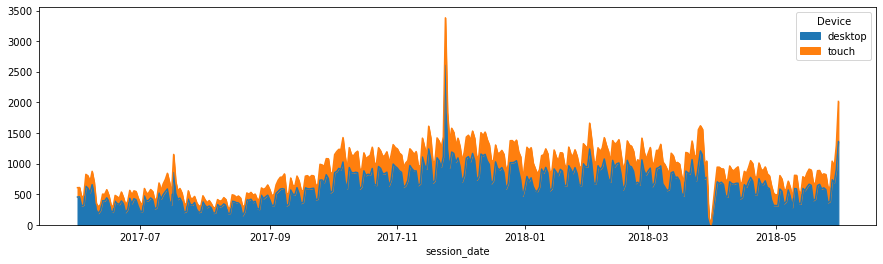

In [13]:
fig, ax = plt.subplots(figsize=(15,4))
visfor_day = df_vis.pivot_table(index = 'session_date', columns = 'Device', values = 'Uid', aggfunc = 'nunique')
visfor_day.describe()
visfor_day.plot(ax = ax, kind = 'area', stacked = True)

In [14]:
first_orders = df_ord.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'Пользователей в день')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


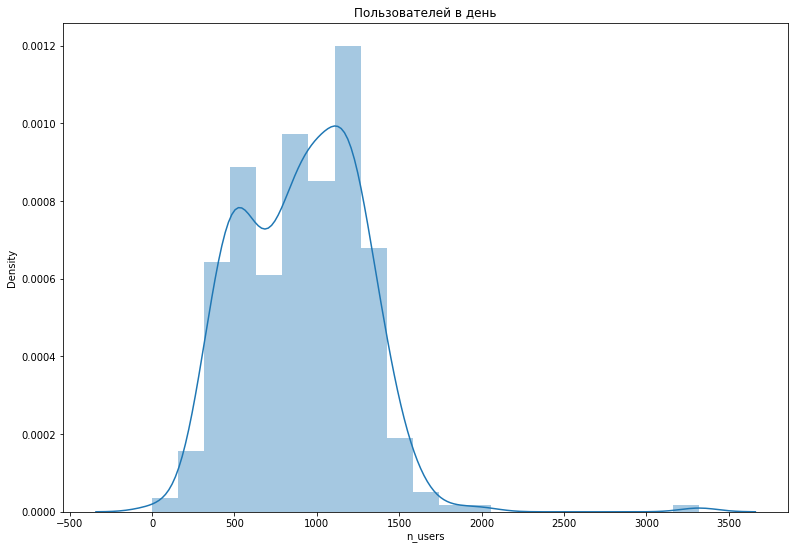

In [15]:
plt.figure(figsize=(13, 9))
plt.title('Пользователей в день')
sns_plot = sns.distplot(sessions_per_user_day['n_users'])
fig = sns_plot.get_figure()

Device,desktop,touch
count,53.000000,53.000000
mean,4135.754717,1637.264151
std,1540.286623,600.438466
min,1361.000000,586.000000
25%,2932.000000,1110.000000
50%,4162.000000,1805.000000
75%,5403.000000,2138.000000
max,8131.000000,2778.000000


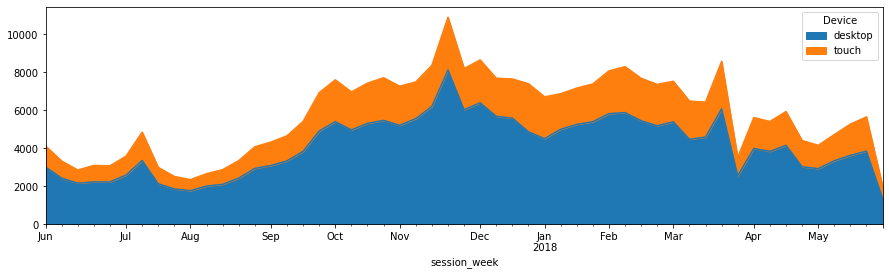

In [16]:
fig, ax = plt.subplots(figsize=(15,4))
visfor_wk = df_vis.pivot_table(index = 'session_week', columns = 'Device', values = 'Uid', aggfunc = 'nunique')
visfor_wk.describe()
visfor_wk.plot(ax = ax, kind = 'area', stacked = True)

Device,desktop,touch
count,12.000000,12.000000
mean,16724.916667,6825.916667
std,5533.916769,2201.062903
min,8611.000000,3132.000000
25%,12668.000000,5315.000000
50%,17209.000000,7475.000000
75%,20752.000000,8752.000000
max,24439.000000,8913.000000


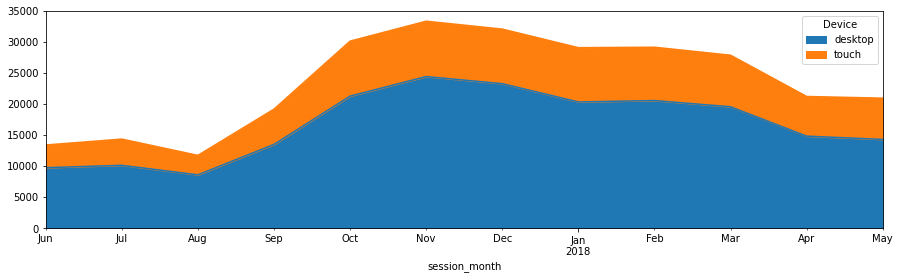

In [17]:
fig, ax = plt.subplots(figsize=(15,4))
visfor_mth = df_vis.pivot_table(index = 'session_month', columns = 'Device', values = 'Uid', aggfunc = 'nunique')
visfor_mth.describe()
visfor_mth.plot(ax = ax, kind = 'area', stacked = True)

Device,desktop,touch
count,364.000000,363.000000
mean,721.337912,266.757576
std,322.327697,110.862623
min,1.000000,47.000000
25%,457.250000,181.000000
50%,711.000000,278.000000
75%,961.500000,337.000000
max,3152.000000,890.000000


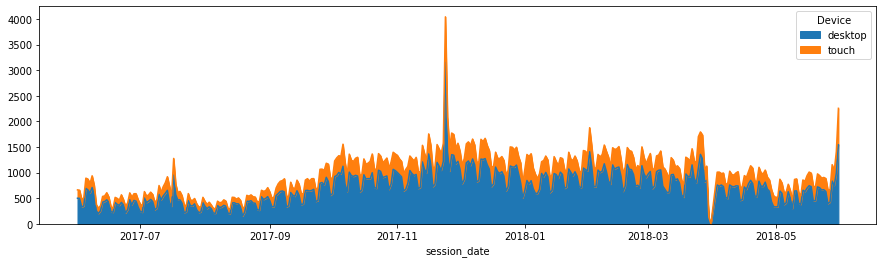

In [18]:
fig, ax = plt.subplots(figsize=(15,4))
ses_day = df_vis.pivot_table(index = 'session_date', columns = 'Device', values = 'Uid', aggfunc = 'count')
ses_day.describe()
ses_day.plot(ax = ax, kind = 'area', stacked = True)

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'Сессий в день')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


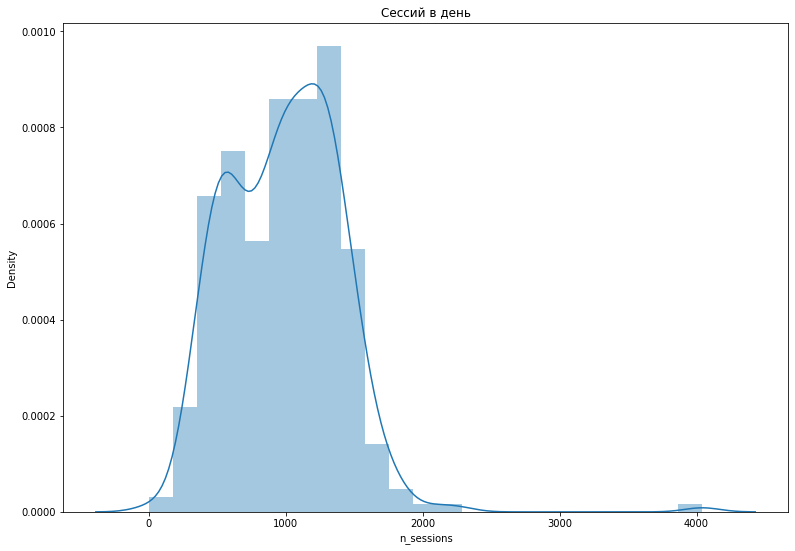

In [19]:
plt.figure(figsize=(13, 9))
plt.title('Сессий в день')
sns_plot = sns.distplot(sessions_per_user_day['n_sessions'])
fig = sns_plot.get_figure()

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'Длительность сессии в секундах')

(0.0, 5000.0, 0.0, 0.001)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


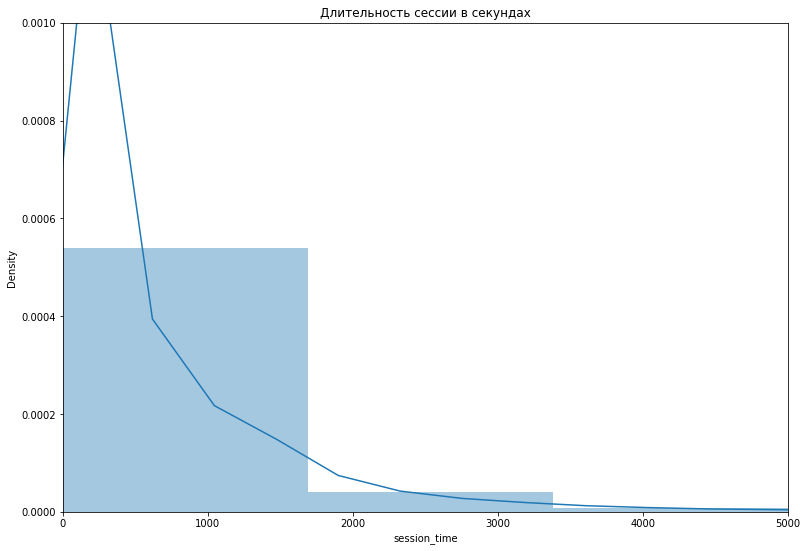

In [20]:
plt.figure(figsize=(13, 9))
plt.title('Длительность сессии в секундах')
plt.axis([0,5000,0,0.001])
sns_plot = sns.distplot(df_vis['session_time'])
fig = sns_plot.get_figure()

In [21]:
first_activity_date = df_vis.groupby(['Uid'])['Start Ts'].min()
first_activity_date.name = 'first_activity_date'
user_activity = df_vis.join(first_activity_date,on='Uid')
user_activity['first_activity'] = user_activity['first_activity_date'].dt.date
user_activity['first_activity_month'] = user_activity['first_activity_date'].astype('datetime64[M]')
user_activity['diffdat'] = ((user_activity['session_month'] - user_activity['first_activity_month'])/np.timedelta64(1,'M')).round().astype('int')
display(user_activity.head(5))
user_activity['diffdat'].describe()

,Device,End Ts,source_id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_time,first_activity_date,first_activity,first_activity_month,diffdat
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27 14:06:00,2017-12-27,2017-12-01,0


count    359400.000000
mean          0.969377
std           2.140980
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          11.000000
Name: diffdat, dtype: float64

In [22]:
cohort_grouped = user_activity.pivot_table(index='first_activity_month', columns='diffdat', values='Uid', aggfunc='nunique') 
display(cohort_grouped)

diffdat,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
cohort_grouped = cohort_grouped.div(cohort_grouped[0],axis=0)
display(cohort_grouped)

diffdat,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'Как часто люди возвращаются')

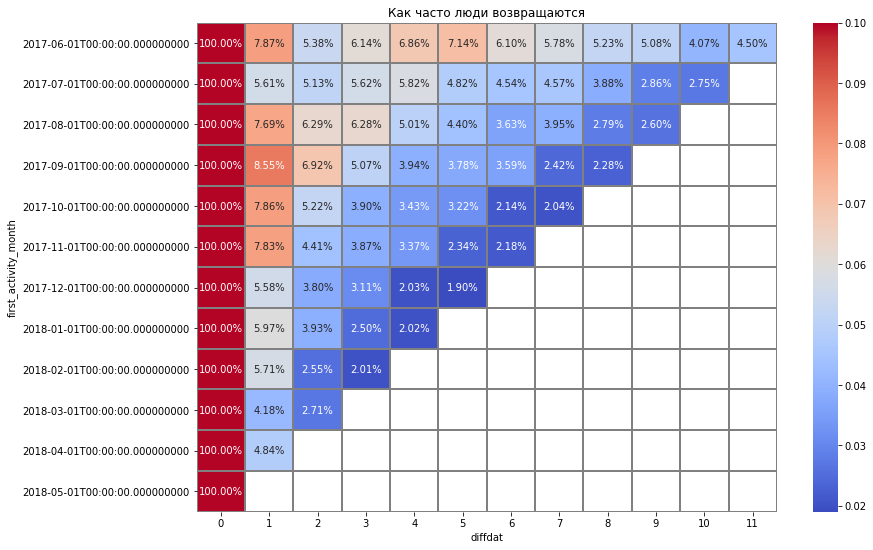

In [24]:
plt.figure(figsize=(13, 9))
plt.title('Как часто люди возвращаются')
sns.heatmap(cohort_grouped, annot=True, vmin=.019, vmax=.1, fmt='.2%', linewidths=1, linecolor='gray',cmap= 'coolwarm') #fmt='.3f'

user_activity['diffdat'].hist(bins=100)
user_activity['diffdat'].describe()

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'Как часто люди возвращаются, месяц')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


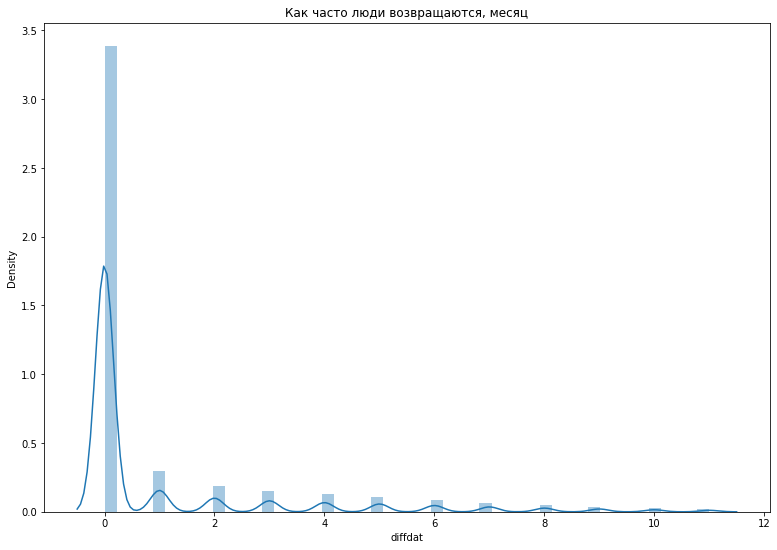

In [25]:
plt.figure(figsize=(13, 9))
plt.title('Как часто люди возвращаются, месяц')
#plt.axis([0,13,0,6])
sns_plot = sns.distplot(user_activity['diffdat'])
fig = sns_plot.get_figure()

In [26]:
first_visits_ = df_vis.sort_values(by = ['Uid', 'Start Ts']).groupby('Uid') \
                     .agg({'Start Ts' : 'first', 'source_id': 'first', 'Device': 'first'})
first_orders_ = df_ord.sort_values(by = ['Uid', 'Buy Ts']).groupby('Uid') \
                     .agg({'Buy Ts' : 'first'})
report = first_visits_.merge(first_orders_, on = 'Uid')
report['delta'] = (report['Buy Ts'] - report['Start Ts']).dt.total_seconds() / 60 /60 #/ np.timedelta64(1, 'h')
report[['delta']].describe()

,delta
count,36523.000000
mean,405.669597
std,1129.746245
min,0.000000
25%,0.066667
50%,0.266667
75%,48.283333
max,8719.066667


<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'Покупка первая через дней')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


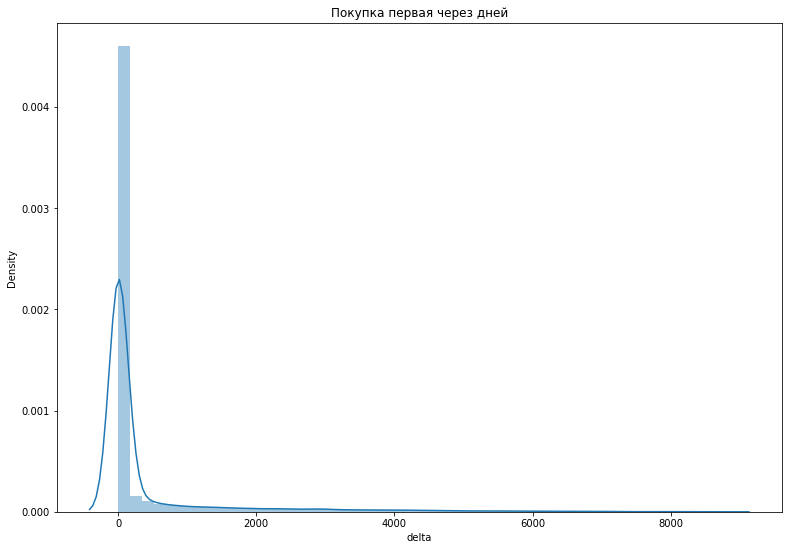

In [27]:
plt.figure(figsize=(13, 9))
plt.title('Покупка первая через дней')
sns_plot = sns.distplot(report['delta'])
fig = sns_plot.get_figure()

In [28]:
df_ord['Buy Ts'] = pd.to_datetime(df_ord['Buy Ts'])
user_buy = df_ord.join(first_activity_date,on='Uid')
user_buy['diffdat'] = (user_buy['Buy Ts'] - user_buy['first_activity_date']).dt.days
user_buy['buy_month'] = user_buy['Buy Ts'].astype('datetime64[M]')
user_buy['first_month'] = user_buy['first_activity_date'].astype('datetime64[M]')

In [29]:
user_buy = user_buy.sort_values(by = 'diffdat', ascending = False)
display(user_buy.head(20))
user_buy['diffdat'].describe()

,Buy Ts,Revenue,Uid,order_month,order_week,first_activity_date,diffdat,buy_month,first_month
50256,2018-05-31 17:20:00,5.07,3263486045884611639,2018-05-01,2018-05-31,2017-06-01 08:51:00,364,2018-05-01,2017-06-01
50040,2018-05-31 11:35:00,4.40,17504196633072064373,2018-05-01,2018-05-31,2017-06-01 17:18:00,363,2018-05-01,2017-06-01
49751,2018-05-30 19:45:00,0.98,9402519610129672491,2018-05-01,2018-05-24,2017-06-01 13:53:00,363,2018-05-01,2017-06-01
50275,2018-05-31 17:35:00,7.33,6916757527179896321,2018-05-01,2018-05-31,2017-06-02 10:31:00,363,2018-05-01,2017-06-01
50242,2018-05-31 16:48:00,1.53,1769286924089306355,2018-05-01,2018-05-31,2017-06-01 20:57:00,363,2018-05-01,2017-06-01
50134,2018-05-31 13:32:00,4.89,16674220541096562302,2018-05-01,2018-05-31,2017-06-01 14:29:00,363,2018-05-01,2017-06-01
50241,2018-05-31 16:43:00,1.47,519541391666399429,2018-05-01,2018-05-31,2017-06-02 16:59:00,362,2018-05-01,2017-06-01
49730,2018-05-30 17:53:00,6.11,3963367130094376110,2018-05-01,2018-05-24,2017-06-01 18:07:00,362,2018-05-01,2017-06-01
50070,2018-05-31 12:15:00,13.57,519541391666399429,2018-05-01,2018-05-31,2017-06-02 16:59:00,362,2018-05-01,2017-06-01
49712,2018-05-30 15:51:00,22.00,3963367130094376110,2018-05-01,2018-05-24,2017-06-01 18:07:00,362,2018-05-01,2017-06-01


count    50415.000000
mean        36.788238
std         70.490602
min          0.000000
25%          0.000000
50%          0.000000
75%         38.000000
max        364.000000
Name: diffdat, dtype: float64

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'Покупка первая через дней')

(0.0, 50.0, 0.0, 0.1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


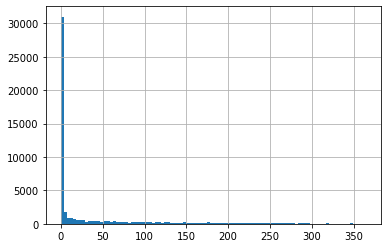

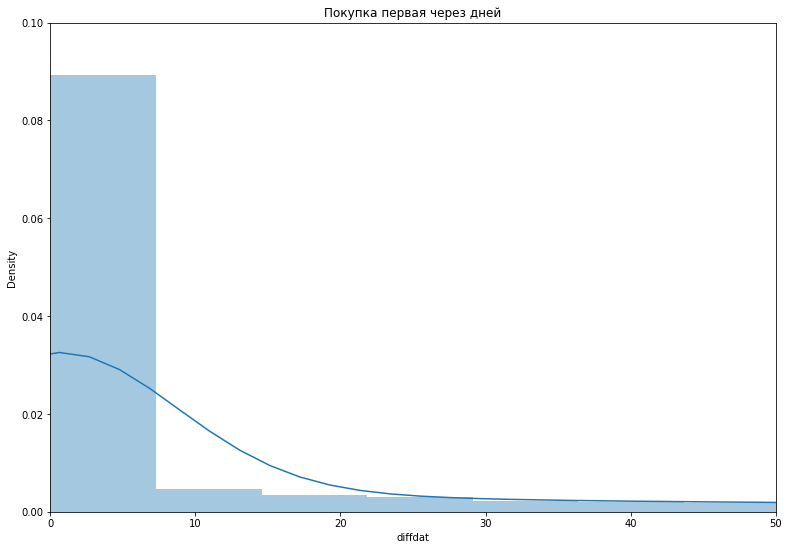

In [30]:
user_buy['diffdat'].hist(bins=100)
plt.figure(figsize=(13, 9))
plt.title('Покупка первая через дней')
plt.axis([0,50,0,0.1])
sns_plot = sns.distplot(user_buy['diffdat'])
fig = sns_plot.get_figure()

In [31]:
buyerstot_mth = df_ord.groupby(['order_month']).agg({'Uid' : 'count'}) 
buyerstot_wk  = df_ord.groupby(['order_week']).agg({'Uid' : 'count'}) 
buyerstot_dt  = df_ord.groupby(['Buy Ts']).agg({'Uid' : 'count'}) 

ses_mth = sessions_per_user_mth.reset_index()
ses_mth = ses_mth.rename(columns={'session_month': 'order_month'})
ses_mth = ses_mth.set_index('order_month')
ses_mth_un = buyerstot_mth.join(ses_mth,how='left')
ses_mth_un['zaper'] = ses_mth_un['Uid'] / ses_mth_un['n_users']
display(ses_mth_un)
ses_mth_un_d = ses_mth_un.drop(['Uid', 'session_year','n_sessions','n_users','sess_per_user'], axis=1)

,Uid,session_year,n_sessions,n_users,sess_per_user,zaper
order_month,,,,,,
2017-06-01,2354,2017.0,16505.0,13259.0,1.244815,0.177540
2017-07-01,2363,2017.0,17828.0,14183.0,1.256998,0.166608
2017-08-01,1807,2017.0,14355.0,11631.0,1.234202,0.155361
2017-09-01,3387,2017.0,23907.0,18975.0,1.259921,0.178498
2017-10-01,5679,2017.0,37903.0,29692.0,1.276539,0.191264
2017-11-01,5659,2017.0,43969.0,32797.0,1.340641,0.172546
2017-12-01,6218,2017.0,41983.0,31557.0,1.330386,0.197040
2018-01-01,4721,2018.0,36939.0,28716.0,1.286356,0.164403
2018-02-01,5281,2018.0,37182.0,28749.0,1.293332,0.183693


count      13.000000
mean     3878.076923
std      1858.113401
min         1.000000
25%      2363.000000
50%      4346.000000
75%      5326.000000
max      6218.000000
Name: Uid, dtype: float64

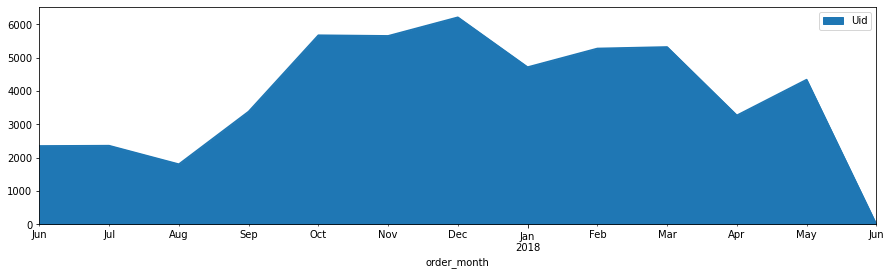

In [32]:
fig, ax = plt.subplots(figsize=(15,4))
buyerstot_mth['Uid'].describe()
buyerstot_mth.plot(ax = ax, kind = 'area', stacked = True)

count      53.000000
mean      951.226415
std       405.229880
min       319.000000
25%       631.000000
50%       972.000000
75%      1214.000000
max      2120.000000
Name: Uid, dtype: float64

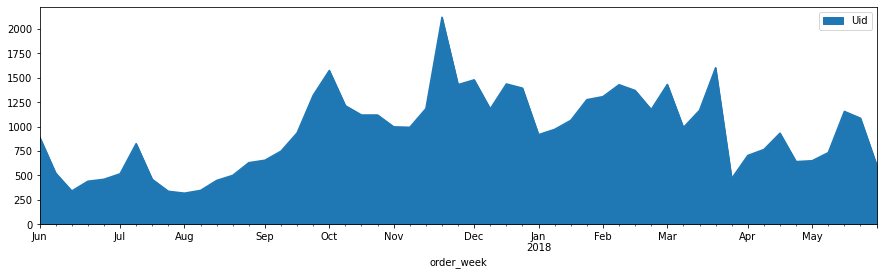

In [33]:
fig, ax = plt.subplots(figsize=(15,4))
buyerstot_wk['Uid'].describe()
buyerstot_wk.plot(ax = ax, kind = 'area', stacked = True)

count    45991.000000
mean         1.096193
std          0.339232
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: Uid, dtype: float64

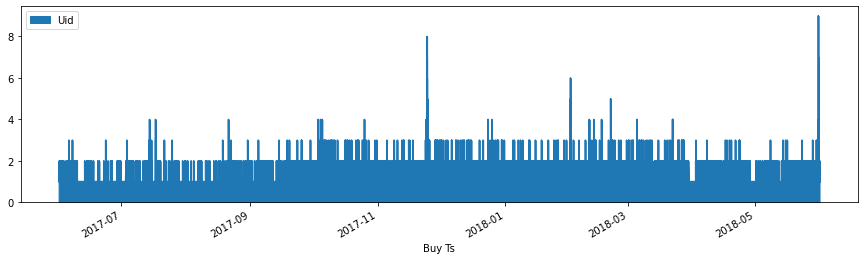

In [34]:
fig, ax = plt.subplots(figsize=(15,4))
buyerstot_dt['Uid'].describe()
buyerstot_dt.plot(ax = ax, kind = 'area', stacked = True)

In [35]:
count_buy = user_buy.pivot_table(index = ['Uid'], values = ['diffdat','Revenue'], aggfunc ={'diffdat':'count', 'Revenue':'mean'} )
count_buy = count_buy.reset_index()
count_buy = count_buy.sort_values(by = 'diffdat', ascending = False)
display(count_buy.head(10))

count_buy2 = user_buy.pivot_table(index = ['Uid'], values = ['diffdat','Revenue'], aggfunc ={'diffdat':'count', 'Revenue':'sum'} )
count_buy2 = count_buy2.reset_index()
count_buy2 = count_buy2.sort_values(by = 'Revenue', ascending = False)
display(count_buy2.head(10))

,Uid,Revenue,diffdat
7206,3644482766749211722,6.043054,239
27482,13888745432979765063,5.004286,238
23600,11920452646463905188,4.948106,227
13459,6731421022966725351,7.927213,183
6922,3501596628378158474,4.668267,150
10200,5139615590553126732,4.970467,150
6475,3263486045884611639,7.728550,131
20471,10343016064897450067,4.451969,127
20003,10116135452198588850,5.060000,124
12332,6166747268563050393,4.336068,117


,Uid,Revenue,diffdat
11014,5539673724080479777,11810.18,101
22073,11149926373378902217,10519.46,16
35670,17999372575896145244,1979.33,37
13459,6731421022966725351,1450.68,183
7206,3644482766749211722,1444.29,239
19248,9737640335185488211,1310.71,47
16979,8539015707073391293,1240.76,24
27482,13888745432979765063,1191.02,238
3276,1668300487562478408,1163.63,45
12541,6268225112727843212,1158.32,45


count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
Name: diffdat, dtype: float64

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'Число покупок')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


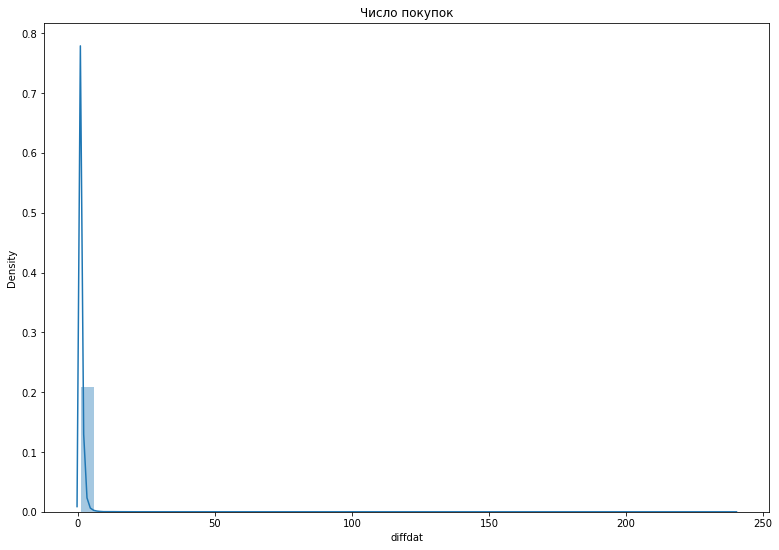

In [36]:
count_buy['diffdat'].describe()
plt.figure(figsize=(13, 9))
plt.title('Число покупок')
#plt.axis([0,5,0,0.1])
sns_plot = sns.distplot(count_buy['diffdat'])
fig = sns_plot.get_figure()

count    36523.000000
mean         4.093093
std          7.671220
min          0.000000
25%          1.285000
50%          2.490000
75%          4.890000
max        657.466250
Name: Revenue, dtype: float64

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'Средний чек пользователя')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


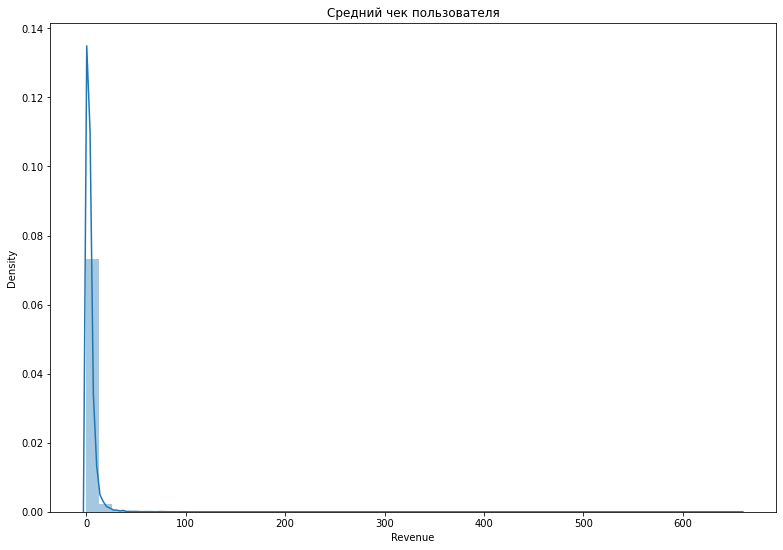

In [37]:
count_buy['Revenue'].describe()
plt.figure(figsize=(13, 9))
plt.title('Средний чек пользователя')
#plt.axis([0,5,0,0.1])
sns_plot = sns.distplot(count_buy['Revenue'])
fig = sns_plot.get_figure()

In [38]:
cohort_grouped_ltv = user_buy.groupby(['first_month','buy_month']).agg({'Revenue':'sum','Uid':'nunique'})
display(cohort_grouped_ltv)

Revenue   Uid
first_month buy_month                 
2017-06-01  2017-06-01   9557.49  2023
            2017-07-01   2664.58   231
            2017-08-01   1464.69   129
            2017-09-01   3882.09   188
            2017-10-01   3940.59   257
...                          ...   ...
2018-03-01  2018-05-01    774.77    90
2018-04-01  2018-04-01   8043.82  1763
            2018-05-01   1838.73   174
2018-05-01  2018-05-01  10368.11  2315
            2018-06-01      3.42     1

[79 rows x 2 columns]

count    36523.000000
mean         6.901328
std         88.128535
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.180000
Name: Revenue, dtype: float64

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'LTV')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


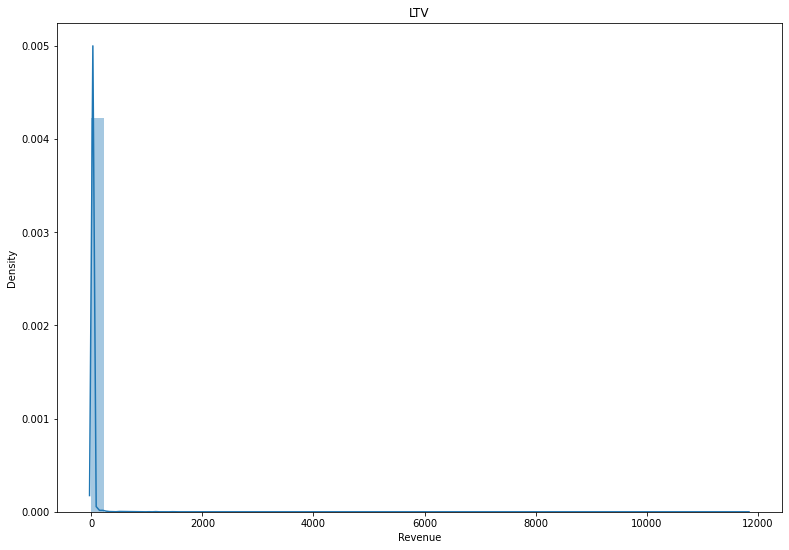

In [39]:
count_buy2['Revenue'].describe()
plt.figure(figsize=(13, 9))
plt.title('LTV')
#plt.axis([0,5,0,0.1])
sns_plot = sns.distplot(count_buy2['Revenue'])
fig = sns_plot.get_figure()

In [40]:
cohort_sizes_ = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes_.columns = ['first_order_month', 'n_buyers']
display(cohort_sizes_.head())

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [41]:
orders_new = pd.merge(df_ord,first_orders, on='Uid')
display(orders_new.head())

,Buy Ts,Revenue,Uid,order_month,order_week,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [42]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
display(cohorts.head()) 

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [43]:
report_ = pd.merge(cohort_sizes_, cohorts, on='first_order_month')
display(report_.head()) 

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [44]:
margin_rate = 1 
report_['gp'] = report_['Revenue'] * margin_rate
report_['age'] = (report_['order_month'] - report_['first_order_month']) / np.timedelta64(1, 'M')
report_['age'] = report_['age'].round().astype('int')
display(report_.head()) 

,first_order_month,n_buyers,order_month,Revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


In [45]:
report_

,first_order_month,n_buyers,order_month,Revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1
77,2018-05-01,2988,2018-05-01,13925.76,13925.76,0


In [46]:
report_['ltv'] = report_['gp'] / report_['n_buyers']
    
output = report_.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='sum').round(2).cumsum(axis=1)
output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'LTV')

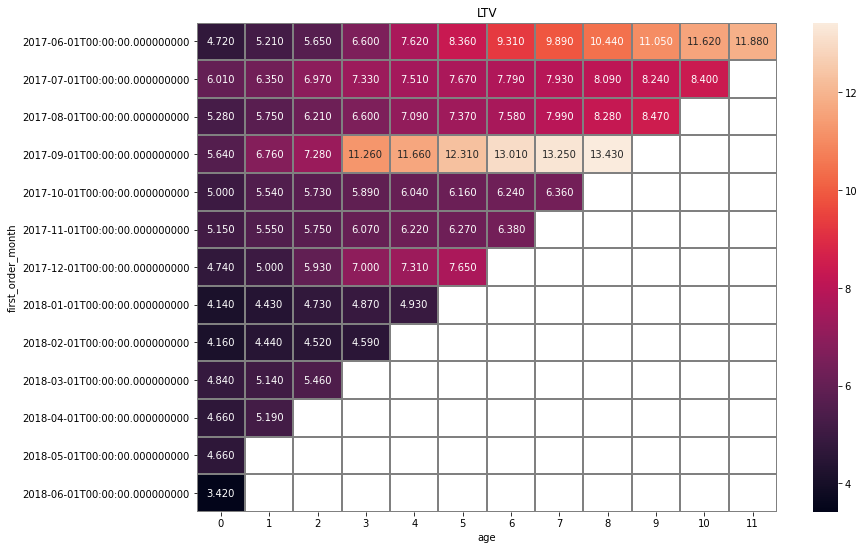

In [47]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output, annot=True, fmt='.3f', linewidths=1, linecolor='gray') 

In [48]:
monthly_costs = df_cos.groupby(['dt_month','source_id']).sum()#agg({'costs': 'nunique'})#
monthly_costs = monthly_costs.reset_index()
monthly_costs.head(15) 

,dt_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
5,2017-06-01,9,285.22
6,2017-06-01,10,314.22
7,2017-07-01,1,1072.88
8,2017-07-01,2,2333.11
9,2017-07-01,3,7674.37


In [49]:
report_new = pd.merge(report_, monthly_costs, left_on='first_order_month', right_on='dt_month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head(20) 
report_new_source = report_new.groupby(['source_id']).agg({'ltv':'mean','cac':'mean'})
display(report_new_source.head(20))

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,dt_month,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,1,1125.61,0.556406
1,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,2,2427.38,1.199891
2,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,3,7731.65,3.821873
3,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,4,3514.80,1.737420
4,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,5,2616.12,1.293188
5,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,9,285.22,0.140989
6,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,10,314.22,0.155324
7,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,2017-06-01,1,1125.61,0.556406
8,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,2017-06-01,2,2427.38,1.199891
9,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,2017-06-01,3,7731.65,3.821873


,ltv,cac
source_id,,
1,1.120532,0.584459
2,1.120532,1.204565
3,1.120532,3.970902
4,1.120532,1.788124
5,1.120532,1.451675
9,1.120532,0.155861
10,1.120532,0.164318


In [50]:
df_cos = df_cos.rename(columns={'dt': 'att_date'})

In [51]:
users = (users.reset_index().set_index(['source_id','att_date']).join(df_cos.set_index(['source_id','att_date']),how='left'))

In [52]:
display(users)

Uid              att_ts   Device  \
source_id att_date                                                        
1         2017-06-01    469568501030474895 2017-06-01 05:30:00  desktop   
          2017-06-01    618675438905551322 2017-06-01 02:37:00    touch   
          2017-06-01   1074355127080856382 2017-06-01 09:21:00  desktop   
          2017-06-01   1292867924428534308 2017-06-01 12:53:00  desktop   
          2017-06-01   1548840741623289234 2017-06-01 01:18:00  desktop   
...                                    ...                 ...      ...   
10        2018-05-31  17550479715346067160 2018-05-31 22:00:00    touch   
          2018-05-31  17715613363403416471 2018-05-31 03:30:00  desktop   
          2018-05-31  18076428844159112818 2018-05-31 17:47:00    touch   
          2018-05-31  18238279803055794091 2018-05-31 15:52:00    touch   
          2018-05-31  18428797902626915731 2018-05-31 22:10:00  desktop   

                      att_month first_order_date first_order_month  costs  \
source_id att_date                                                          
1         2017-06-01 2017-06-01       2017-06-01        2017-06-01   75.2   
          2017-06-01 2017-06-01       2017-06-01        2017-06-01   75.2   
          2017-06-01 2017-06-01       2017-06-01        2017-06-01   75.2   
          2017-06-01 2017-06-01       2017-06-01        2017-06-01   75.2   
          2017-06-01 2017-06-01       2017-06-01        2017-06-01   75.2   
...                         ...              ...               ...    ...   
10        2018-05-31 2018-05-01       2018-05-31        2018-05-01   17.6   
          2018-05-31 2018-05-01       2018-05-31        2018-05-01   17.6   
          2018-05-31 2018-05-01       2018-05-31        2018-05-01   17.6   
          2018-05-31 2018-05-01       2018-05-31        2018-05-01   17.6   
          2018-05-31 2018-05-01       2018-05-31        2018-05-01   17.6   

                       dt_month  
source_id att_date               
1         2017-06-01 2017-06-01  
          2017-06-01 2017-06-01  
          2017-06-01 2017-06-01  
          2017-06-01 2017-06-01  
          2017-06-01 2017-06-01  
...                         ...  
10        2018-05-31 2018-05-01  
          2018-05-31 2018-05-01  
          2018-05-31 2018-05-01  
          2018-05-31 2018-05-01  
          2018-05-31 2018-05-01  

[228169 rows x 8 columns]

In [53]:
usr_cost = users.groupby(['source_id','att_date']).agg({'Device':'count','costs':'max'}).rename(columns = {'Device':'users'}).reset_index()
usr_cost['att_cost'] = usr_cost['costs'] / usr_cost['users']
users = users.merge(usr_cost[['source_id','att_date','att_cost']],on=['source_id','att_date'],how = 'left')
users = users[['Uid','att_ts','att_date','att_month','source_id','Device','att_cost']]
users['att_cost'] = users['att_cost'].fillna(0)

In [54]:
display(users.sample(5))
display(usr_cost.sample(10))

,Uid,att_ts,att_date,att_month,source_id,Device,att_cost
147362,9179570511702157615,2018-02-27 11:17:00,2018-02-27,2018-02-01,4,desktop,0.252862
138634,4038913395314227743,2018-01-24 20:30:00,2018-01-24,2018-01-01,4,desktop,0.410930
212438,170047274149461214,2018-05-08 13:15:00,2018-05-08,2018-05-01,5,desktop,1.292769
127274,9596944412423014748,2017-12-12 17:11:00,2017-12-12,2017-12-01,4,desktop,1.209926
63364,10947387260566887922,2017-12-20 01:19:00,2017-12-20,2017-12-01,3,desktop,2.739430


,source_id,att_date,users,costs,att_cost
1557,5,2017-09-13,105,89.67,0.854000
176,1,2017-11-24,149,245.75,1.649329
2423,10,2018-01-05,15,7.29,0.486000
950,3,2018-01-10,253,448.79,1.773874
1667,5,2018-01-01,155,149.29,0.963161
2003,9,2017-11-04,4,17.76,4.440000
2177,9,2018-05-03,18,8.89,0.493889
2273,10,2017-08-08,2,5.42,2.710000
1622,5,2017-11-17,219,195.20,0.891324
325,1,2018-04-23,29,41.57,1.433448


In [55]:
users.head()

,Uid,att_ts,att_date,att_month,source_id,Device,att_cost
0,469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6
1,618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6
2,1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6
3,1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6
4,1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6


In [56]:
user_one = users.groupby(['source_id']).agg({'Uid':'count','att_cost':'sum'})
user_one['source_cost'] = user_one['att_cost'] / user_one['Uid']
user_one = user_one.reset_index()
display(user_one)

,source_id,Uid,att_cost,source_cost
0,1,9469,20833.27,2.200155
1,2,17616,42806.04,2.429952
2,3,66116,141321.63,2.137480
3,4,72346,61073.60,0.844188
4,5,49237,51756.40,1.051169
5,6,2,0.00,0.000000
6,7,32,0.00,0.000000
7,9,6448,5454.42,0.845909
8,10,6903,5821.12,0.843274


In [57]:
user_two = users.groupby(['Device']).agg({'Uid':'count','att_cost':'sum'})
user_two['source_cost'] = user_two['att_cost'] / user_two['Uid']
user_two = user_two.reset_index()
display(user_two)

,Device,Uid,att_cost,source_cost
0,desktop,160795,235065.750929,1.461897
1,touch,67374,94000.729071,1.395208


In [58]:
import plotly.express as px
fig = px.line(user_one, x="source_id", y="att_cost", title='Сколько денег потратили?')
fig.show()

In [59]:
import plotly.express as px
fig = px.line(user_one, x="source_id", y="source_cost", title='Сколько стоило привлечение одного покупателя из каждого источника')
fig.show()

In [60]:
display(user_one)

,source_id,Uid,att_cost,source_cost
0,1,9469,20833.27,2.200155
1,2,17616,42806.04,2.429952
2,3,66116,141321.63,2.137480
3,4,72346,61073.60,0.844188
4,5,49237,51756.40,1.051169
5,6,2,0.00,0.000000
6,7,32,0.00,0.000000
7,9,6448,5454.42,0.845909
8,10,6903,5821.12,0.843274


In [61]:
dimensions = ['source_id']
cohorts = users.groupby(dimensions).agg({'source_id':'count','att_cost':'sum'}).rename(columns = {'source_id':'cohort_size'})
users_ = users.set_index('Uid')
ltv0 = user_buy.set_index('Uid').join(users_,how = 'left')[['att_month','source_id','Device','buy_month','Revenue']]
ltv0['age_month'] = ((ltv0['buy_month'] - ltv0['att_month']) / np.timedelta64(1,'M')).round().astype('int')
ltv0 = ltv0.groupby(dimensions + ['age_month']).agg({'Revenue':'sum'})
ltv0 = pd.pivot_table(ltv0, index = dimensions, columns = 'age_month',values = 'Revenue',aggfunc = 'sum')
ltv0 = ltv0.cumsum(axis=1)
ltv0 = cohorts[['cohort_size']].join(ltv0)
ltv0 = ltv0.div(ltv0['cohort_size'],axis = 0).drop(columns = ['cohort_size'])
display(ltv0.head(10))
user_one_ = user_one.set_index('source_id')
ltv_romi = user_one_[['source_cost']].join(ltv0)
ltv_romi = ltv_romi.div(ltv_romi['source_cost'],axis = 0).drop(columns = ['source_cost'])
display(ltv_romi.head(10))

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,1.534161,1.810219,1.999839,2.288663,2.467350,2.585022,2.683702,2.916896,3.049194,3.141014,3.227996,3.283404
2,1.016428,1.360377,1.703597,2.072417,2.253705,2.394160,2.463452,2.507828,2.550502,2.604603,2.641813,2.663693
3,0.570372,0.659824,0.697257,0.731096,0.761171,0.782027,0.798246,0.807016,0.814781,0.819245,0.822212,0.824479
4,0.517687,0.579292,0.608671,0.637434,0.661811,0.691519,0.720278,0.730149,0.743284,0.762166,0.773152,0.783690
5,0.584571,0.654081,0.695008,0.915836,0.951518,0.995270,1.018674,1.037467,1.048500,1.064406,1.067149,1.068790
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.038125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.368263,0.466126,0.554842,0.633721,0.704563,0.739634,0.782604,0.813542,0.856348,0.881770,0.890800,0.893207
10,0.514917,0.558789,0.577229,0.588343,0.613280,0.624930,0.635299,0.639061,0.639681,0.642244,0.643377,0.644695


,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.697297,0.822769,0.908954,1.040228,1.121444,1.174927,1.219778,1.325768,1.385900,1.427633,1.467167,1.492351
2,0.418291,0.559837,0.701083,0.852863,0.927469,0.985270,1.013786,1.032048,1.049610,1.071874,1.087187,1.096191
3,0.266843,0.308693,0.326205,0.342036,0.356107,0.365864,0.373452,0.377555,0.381188,0.383276,0.384664,0.385725
4,0.613237,0.686213,0.721014,0.755086,0.783961,0.819153,0.853220,0.864913,0.880473,0.902840,0.915853,0.928336
5,0.556115,0.622242,0.661176,0.871255,0.905200,0.946823,0.969087,0.986965,0.997461,1.012592,1.015202,1.016764
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.435346,0.551036,0.655912,0.749159,0.832906,0.874366,0.925163,0.961737,1.012340,1.042393,1.053069,1.055914
10,0.610616,0.662642,0.684509,0.697689,0.727260,0.741076,0.753372,0.757834,0.758569,0.761608,0.762951,0.764514


<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'LTV source')

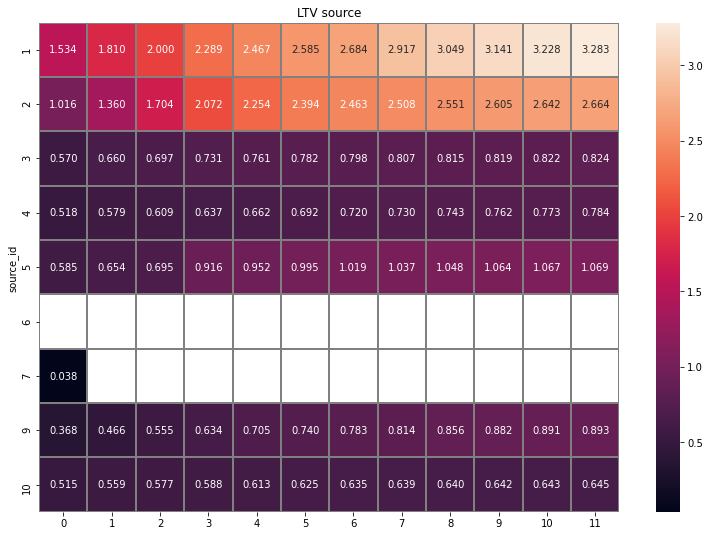

In [62]:
plt.figure(figsize=(13, 9))
plt.title('LTV source')
sns.heatmap(ltv0, annot=True, fmt='.3f', linewidths=1, linecolor='gray') 

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'romi source')

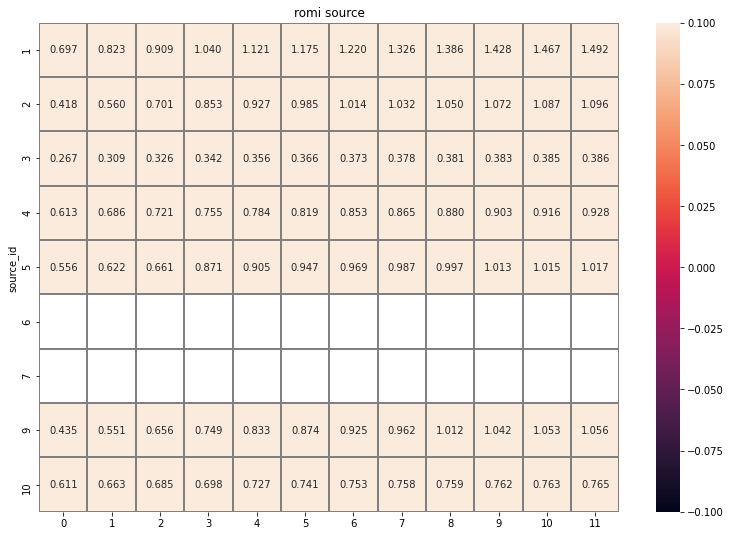

In [63]:
plt.figure(figsize=(13, 9))
plt.title('romi source')
sns.heatmap(ltv_romi, annot=True, fmt='.3f', linewidths=1, linecolor='gray') 

In [64]:
dimensions = ['Device']
cohorts = users.groupby(dimensions).agg({'source_id':'count','att_cost':'sum'}).rename(columns = {'source_id':'cohort_size'})
users_ = users.set_index('Uid')
ltv0 = user_buy.set_index('Uid').join(users_,how = 'left')[['att_month','source_id','Device','buy_month','Revenue']]
ltv0['age_month'] = ((ltv0['buy_month'] - ltv0['att_month']) / np.timedelta64(1,'M')).round().astype('int')
ltv0 = ltv0.groupby(dimensions + ['age_month']).agg({'Revenue':'sum'})
ltv0 = pd.pivot_table(ltv0, index = dimensions, columns = 'age_month',values = 'Revenue',aggfunc = 'sum')
ltv0 = ltv0.cumsum(axis=1)
ltv0 = cohorts[['cohort_size']].join(ltv0)
ltv0 = ltv0.div(ltv0['cohort_size'],axis = 0).drop(columns = ['cohort_size'])
display(ltv0.head(10))
user_two_ = user_two.set_index(dimensions)
ltv_romi2 = user_two_[['source_cost']].join(ltv0)
ltv_romi2 = ltv_romi2.div(ltv_romi2['source_cost'],axis = 0).drop(columns = ['source_cost'])
display(ltv_romi2.head(10))

,0,1,2,3,4,5,6,7,8,9,10,11
Device,,,,,,,,,,,,
desktop,0.728664,0.843359,0.924280,1.069796,1.130539,1.182688,1.219687,1.246150,1.266860,1.288880,1.303720,1.314281
touch,0.373185,0.446775,0.478607,0.502507,0.521153,0.538848,0.551608,0.569115,0.583387,0.596858,0.601088,0.604498


,0,1,2,3,4,5,6,7,8,9,10,11
Device,,,,,,,,,,,,
desktop,0.498437,0.576893,0.632247,0.731786,0.773337,0.809009,0.834318,0.852420,0.866586,0.881649,0.891800,0.899024
touch,0.267476,0.320221,0.343036,0.360167,0.373531,0.386213,0.395359,0.407907,0.418136,0.427792,0.430823,0.433267


<Figure size 936x288 with 0 Axes>

Text(0.5, 1.0, 'LTV source')

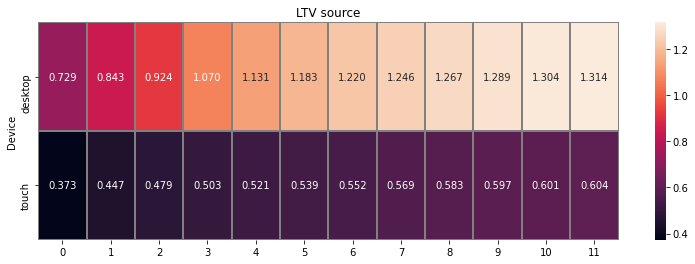

In [65]:
plt.figure(figsize=(13, 4))
plt.title('LTV source')
sns.heatmap(ltv0, annot=True, fmt='.3f', linewidths=1, linecolor='gray') 

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'romi source')

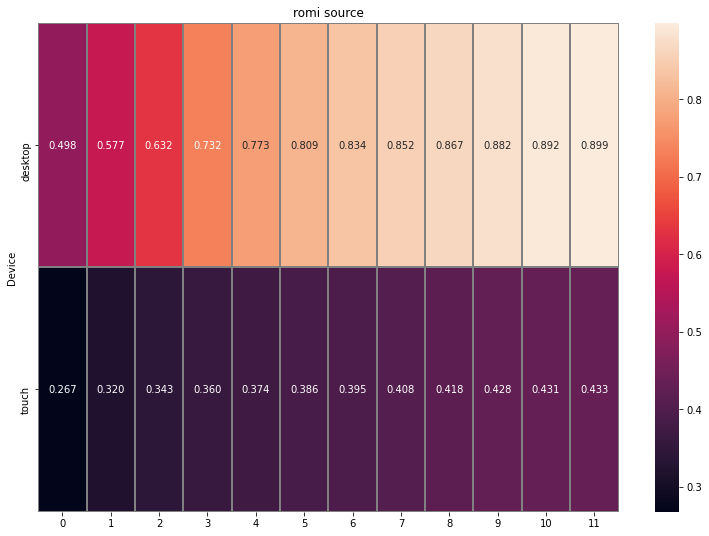

In [66]:
plt.figure(figsize=(13, 9))
plt.title('romi source')
sns.heatmap(ltv_romi2, annot=True, fmt='.3f', linewidths=1, linecolor='gray') 

In [67]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output = output.cumsum(axis=1).round(2) 

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'romi')

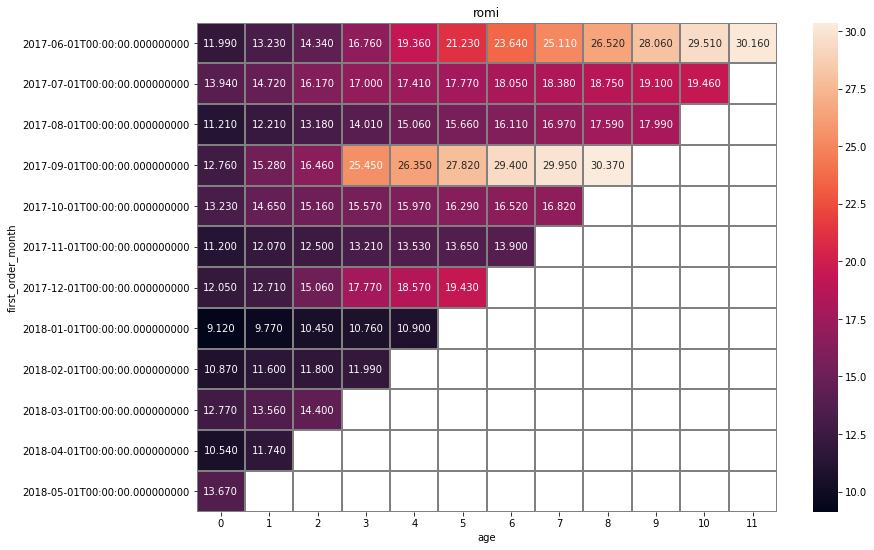

In [68]:
plt.figure(figsize=(13, 9))
plt.title('romi')
sns.heatmap(output, annot=True, fmt='.3f', linewidths=1, linecolor='gray') 

In [69]:
output.cumsum(axis=1).mean(axis=0) 

age
0      11.945833
1      24.656364
2      38.846000
3      54.472222
4      72.642500
5      94.570000
6     114.003333
7     140.238000
8     167.552500
9     173.840000
10    210.250000
11    259.910000
dtype: float64

### Вывод:
- 900 в день, 5700 неделю, 24-24тыс месяц человек пользуется продуктом в среднем
- 1000 сессий в день, видим что пользователи заходят в среднем раз в день
- в среднем сессия 5-10 минут, значит нужно работать над удержанием пользователя, чтобы пользователь больше информации изучал за сессию
- Возвращаются через 15-30 дней, что долго, неплохо было бы уменьшить время до 7 дней
- первая покупка через 37-38 дней в среднем, значит нет доверия к сайту или плохие условия продажи, что покупают где-то в другом месте, а сюда возвращаются только в самый последний момент, только через месяц после поиска события.
- 4000 покупок в месяц, 1000 в неделю, то есть покупает делает покупку каждый 6 шестой
- средний чек 2,5-4
- большую часть прибыли пользователь приносит в первый месяц, потом постепенно растет и может расти до 100% увелечения в зависимости от когорты. По источникам 1,2,3 лтв больше других каналов в 3 раза, по десктопу в 2 раза больше мобайла
- на источник 3 потратили больше всего, по 1 меньше всего, 6,7 нет затрат и нет оттуда пользователей, остальные примерно близко по затратам
- самые дешевые покупатели из 4,9,10 источников, дороже из 1,2,3
- быстрее всего окупается 1 источник на 4й месяц. 3,4,10 так и не окупились. Десктоп окупается быстрее мобайла в 2 раза.
### - Рекомендации
- выяснить почему посетителей с мобайла больше чем с десктопа, но покупают в 2 раза чаще с десктопа и на сумму в 2 раза больше.
- По 1 увеличить расходы, окупается быстро, но стоимость привлечения пользователя высокая и мало бюджета потратили на него. 3 снизить расходы так как не окупается, тратится больше всего денег и счамый дорогой покупатель, выяснить на каких затратах начинает окупаться. 4,10 можно выключить затраты, даже при самых дешевых покупателях он не окупается. Увеличить затраты на 9, он окупается и дешевое привлечение, есть потенциал. Осторожно увеличить затраты на 5, хоть и окупается но цена пользователя не самая дешевая. По 2 тесты в самый последнюю очередь, окупается но стоимость привлечения высокая. 
- по источникам 6,7 выянсить почему нет затрат и привлечения